<a href="https://colab.research.google.com/github/ocalru/EDP-I-Simulacion-I/blob/main/Monte_Carlo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
    <font size="10" color="lightblue" >Metodo de Montecarlo Acierto y Error</font>
</p>

Se tiene la integral definida $I$ en el intervalo $[a,b]$:

$$
I = \int_a^b g(x)\,dx
$$

Suponiendo que:

- $0 \leq g(x) \leq c$

- $a \leq x \leq b$

Como ejemplo, calculemos una integral no soluble por métodos analíticos:

$$
\int_0^1 \sqrt{\arctan(x)} \, dx
$$

Donde:

- $ g(x) = \sqrt{\arctan(x)} $
- $ a = 0 $
- $ b = 1 $




Primero, definimos y graficamos la función de prueba:

In [2]:
import numpy as np # Se importa la libreria numpy como "np"
import matplotlib.pyplot as plt # Se importa la libreria matplotlib como "plt"
import pandas as pd # Se importa la libreria panda como "pd"
import random as rd # Se importa la libreria random como "rd"
import time # se importa la libreria time

def g(x): # Se define la funcion test_function(x) en el parametro  de entrada "x", esta funcion es la funcion g(x).

# La funcion retorna el valor de np.sqrt(np.arctan(x)), "sqrt()" y "arctan()" son las funciones raiz cuadrada y arcotangente respectivamente,
# sacadas de la libreria numpy

    return(np.sqrt(np.arctan(x)))


Sea $ n \in \mathbb{N} $, con $ n \geq 2 $, el número de puntos que deseamos distribuir uniformemente en el intervalo cerrado $[a, b] \subset \mathbb{R} $, con $ a < b $.

Para distribuir estos $ n $ puntos de forma uniforme entre $ a $ y $ b $, se generan $ n - 1 $ subintervalos **iguales**.

Por lo tanto la  distancia entre puntos consecutivos es:

$$
\Delta x = \frac{b - a}{n - 1}
$$

Los puntos distribuidos en el intervalo serán entonces:

$$
x_0 = a,\quad x_1 = a + \Delta x,\quad x_2 = a + 2\Delta x,\quad \ldots,\quad x_{n-1} = a + (n - 1)\Delta x = b
$$

Es decir, el conjunto de puntos distribuidos uniformemente es:

$$
\{x_i\}_{i = 0}^{n - 1} = \left\{ a + i \cdot \Delta x \;\middle|\; i = 0, 1, 2, \dots, n - 1 \right\}
$$

Para este caso:
- $ a = 0 $
- $ b = 1 $
- $ n = 1000 $

Entonces:

$$
\Delta x = \frac{1 - 0}{1000 - 1} = \frac{1}{999} \approx 0.001001001
$$



Se tiene la formula para $x_i$:

$$
x_i = \frac{i}{999}, \quad \text{para } i = 0, 1, 2, \dots, 999
$$

Ya que $ a = 0$ y $\Delta x = \frac{1}{999}$


Calculando los terminos de la sucesion $x_i$:

$$
\begin{aligned}
x_0 &= \frac{0}{999} = 0 \\
x_1 &= \frac{1}{999} \approx 0.001001001 \\
x_2 &= \frac{2}{999} \approx 0.002002002
\end{aligned}
$$
$$
\vdots
$$





Entonces se define el arreglo $x_i$ como:

$$
x_i = [
0.000,\
0.001001001,\
0.002002002, \ldots ]
$$


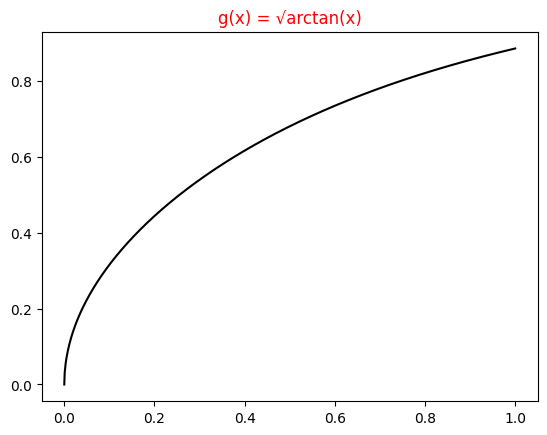

In [3]:
x_i=np.linspace(0,1,1000) # Para definir el eje de las ordenadas ( eje X) en la grafica se tiene que eje X = x_i = [0,1] dividiendo el intervalo [0,1] en 1000 subintervalos.
y_i = g(x_i) # Se define el eje de las abcisas ( eje Y ) en la grafica se tiene que eje Y = y_i = [0, max(g(x_i))]
plt.title('g(x) = √arctan(x)', color='red') # el titulo de la imagen sera "g(x) = √arctan(x) de color rojo
plt.plot(x_i, g(x_i), color = "black")# Mostrar los arreglos x_i y g_i, formando la grafica en su conjunto, la grafica del conunto x_i, g_i sera en color negro

<p align="center">
    <font size="5" color="lightblue">Metodo de Acierto y Error </font>
</p>



Sea $ (X,Y)$ un vector aleatorio distribuido uniformemente sobre el rectángulo  

$$
R = [a,b] \times [0,c],
$$

es decir, con base $(b-a)$ y altura $c$.


La función de densidad conjunta de $ (X,Y)$ es:

$$
f_{X,Y}(x,y) =
\begin{cases}
\dfrac{1}{c(b-a)}, & a \leq x \leq b,\ 0 \leq y \leq c, \\[10pt]
0, & \text{en otro caso}.
\end{cases}
$$

Esto significa que cada punto del rectángulo tiene la misma probabilidad de ocurrir.


Definimos:

$$
S = \{(x,y) \in R \mid y \leq g(x)\}.
$$

Es decir, todos los puntos que caen debajo de la curva $ g(x)$.



La probabilidad de que $ (X,Y)$ caiga en $S$ es:

$$
p = \mathbb{P}\big((X,Y)\in S\big)
= \iint_S f_{X,Y}(x,y)\,dx\,dy.
$$

Sustituyendo la densidad uniforme:

$$
p = \frac{1}{c(b-a)} \int_a^b \int_0^{g(x)} dy\,dx
= \frac{1}{c(b-a)} \int_a^b g(x)\,dx.
$$

Se definio:

$$
I = \int_a^b g(x)\,dx.
$$

Entonces:

$$
p = \frac{I}{c(b-a)}
\quad \Longleftrightarrow \quad
I = c(b-a)p.
$$



Si generamos $n$ vectores aleatorios independientes $(x_1, y_1)$, $(x_2, y_2)$, ..., $(x_n, y_n)$, la probabilidad $p$ puede ser estimado por:

$$\hat{p} = \frac{n_A}{n}$$


Donde:

 - $n_A = $ número de puntos tal que se cumple que:

$$y \leq g(x)$$

- $n =$ numero total de puntos generados ( tamaño de muestra)


Se define el estimador $\hat{\theta_1}$ como la aproximacion del parametro  $ I$ ($ I\approx \hat{\theta_1}$):


$$\hat{\theta_1} = [c(b-a)]\hat{p} = c(b-a)\frac{n_A}{n} $$

Para que $ \hat{\theta_1} $ sea un estimador insesgado:

$$μ_\hat{\theta_1}= \mathbb{E}[(\hat{\theta_1})]= I$$


<p align="center">
    <font size="10" color="lightblue" > Varianza del estimador Monte Carlo por Acierto y Error</font>
</p>

Se tiene el estimador:

$$
\hat{\theta}_1 = c(b-a)\hat{p},
$$

Donde  $ \hat{p} = \frac{n_a}{n}$


Sea la variable aleatoria

$$
X_i =
\begin{cases}
1, & \text{si el punto cae debajo de la curva } g(x) \; \text{(acierto)} \\
0, & \text{si el punto cae arriba de la curva } g(x) \; \text{(error)}
\end{cases}
$$

Con:  

$$
P(X_i = 1) = p,
\quad
P(X_i = 0) = 1-p.
$$

Entonces cada $ X_i \sim \text{Bernoulli}(p)$.

Se tiene que $n_A$

$$
n_A = \sum_{i=1}^n X_i
$$

Como cada variable aleatoria  $ X_i $ sigue una distribucion binomial. Entonnces $n_a$ sigue una distribución binomial:

$$
n_A \sim \text{Binomial}(n,p).
$$


<p align="center">
    <font size="6" color="lightblue" > Propiedad de la varianza con constantes </font>
</p>
Si multiplicamos un estimador por una constante $ k$, la varianza escala al cuadrado:

$$
\mathrm{Var}(kX) = k^2 \, \mathrm{Var}(X).
$$

Por lo tanto:

$$
\mathrm{Var}(\hat{\theta}_1) = \big(c(b-a)\big)^2 \, \mathrm{Var}(\hat{p})..... (1)
$$


Recordemos que:

$$
\hat{p} = \frac{n_A}{n}
$$

Entonces:

$$
\mathrm{Var}(\hat{p})
= \mathrm{Var}\left(\frac{n_A}{n}\right)
= \frac{1}{n^2}\,\mathrm{Var}(n_A)......(2)
$$



Como $n_A \sim \text{Binomial}(n,p)$:

$$
\mathrm{Var}(n_A) = n \, p \,(1-p).....(3)
$$

Sustituyendo $(2)$ en $(3)$:

$$
\mathrm{Var}(\hat{p})
= \frac{1}{n^2}\, \big(n p (1-p)\big)
= \frac{p(1-p)}{n}.....(4)
$$

Sustituyendo $(4)$ en $(1)$:

$$
\mathrm{Var}(\hat{\theta}_1)
= \big(c(b-a)\big)^2 \cdot \frac{p(1-p)}{n}.
$$



El valor de $ p$ es:

$$
p = \frac{I}{c(b-a)},
$$


Sustituyendo:

$$
\mathrm{Var}(\hat{\theta}_1)
= \frac{(c(b-a))^2}{n} \cdot \frac{I}{c(b-a)} \Bigg(1 - \frac{I}{c(b-a)}\Bigg).
$$

Simplificando:

$$
\boxed {\mathrm{Var}(\hat{\theta}_1) = \frac{I \big(c(b-a) - I\big)}{n}}.
$$

Nota:
- Tanto el valor de $n$ vaya aumentando $ ( n → ∞ ) $ la varianza ira disminuyendo.


In [49]:
def mc(a,b,c,n):
  aciertos = 0 # la variable "aciertos" cuenta la cantidad de puntos que esta debajo de la curva g(x) = arctan (x) (n_A = aciertos)
  for i in range (n): # desde i = 0 hasta i = 10000 - 1 se aplicaran las instrucciones:
    x = np.random.uniform(a,b) # se generara un numero aleatorio entre a = 0 y b = 1 que sigan una distribucion uniforme
    y = np.random.uniform(a,b) # se generara un numero aleatorio entre a = 0 y b = 1 que sigan una distribucion uniforme
    if y <= g(x): # Si el punto generado esta debajo o sobre de la grafica g(x) = arctan (x):
      aciertos += 1 # se sumara 1 al arreglo "aciertos"
  I = c*(b-a)*(aciertos/n) # arpoximacion de la integral I usando el estimador insesgado θ_1
  var_theta_1 = (I*((c*(b-a)) - I))/n # varianza del estiamdor θ_1
  des_theta_1 = np.sqrt(var_theta_1) # desviacion estandar del estimador
  # para hacer una multiplicacion, se debe usar asteriscos en cada termino de la multiplicacion
  return I, des_theta_1, var_theta_1
r_1 = mc(0,1,1,1000) # se define r_1 como la variable que guardara la tupla del resultado de evaluar la funcion mc(a,b,c,n) con a = 0, b = 1, c = 1, n = 1000
# al ser mc(a,b,c,n) una funcion que devuelve 3 valores var_theta_1, des_theta_1, se le asigna un index a cada valor empezando desde 0 hasta v-valores de salida
# En este caso v = 3 ( 3 valore de salida), se usa r[v] para mostrar estos valores de salida
print(f"El valor aproximado de la integral es: {float(r_1[0]):.10f} \n El valor del error de aproximacion de aproximacion es ( desviacion estandar): {float(r_1[1]):.10f} \nEl valor del error al cuadrado (Varianza) : {float(r_1[2]):.10f}")
#Va a mostrara los valores de la tupla r usando r[v] donde v es el numero de valores de r
# Notas:
# La funcion scatter() sirve para graficar un solo punto
# No dejar espacio dentro de las comillas
# ( plot() sirve para graficar ejes de graficas)

El valor aproximado de la integral es: 0.6210000000 
 El valor del error de aproximacion de aproximacion es ( desviacion estandar): 0.0153414145 
El valor del error al cuadrado (Varianza) : 0.0002353590


In [5]:
def estado_transitorio(n,a,b,c): # se define la funcion "evo()" con parametro de entrada N, esto para ver la evolucion del valor de I respceto a el numero de iteraciones
  lista = [] # se crea el arreglo lista
  aciertos = 0 # numero de punto tal que se cumple que y <= g(x)
  for i in range (n): # desde i = 0 hasta i = n - 1 se aplicaran las instrucciones:
    x =np.random.uniform(a,b)# se generara un numero aleatorio entre a y b que sigue una distribucion uniforme
    y =np.random.uniform(a,b) # se generara un numero aleatorio entre a, b que sigue una distribucion uniforme
    if y <= g(x): # Si el punto generado esta debajo o sobre de la grafica g(x) = arctan (x):
      aciertos += 1  # se sumara 1 al arreglo "aciertos"
    teta_1 = c*(b-a)*aciertos/(i+1) # por cada iteracion i, se dividira al numero de aciertos actual por i + 1, donde i = 0 hasta i = N - 1
    # esto se hace para ver como evoluciona la aproximacion de motecarlo en cada iteracion i
    lista.append(teta_1) # se agregara cada valor de I al arreglo "lista"
  return(lista) # el resultado de la funcion es el arreglo "lista"


Text(0.5, 1.0, ' Metodo de Montecarlo para g(x) = √ arctan(x) ')

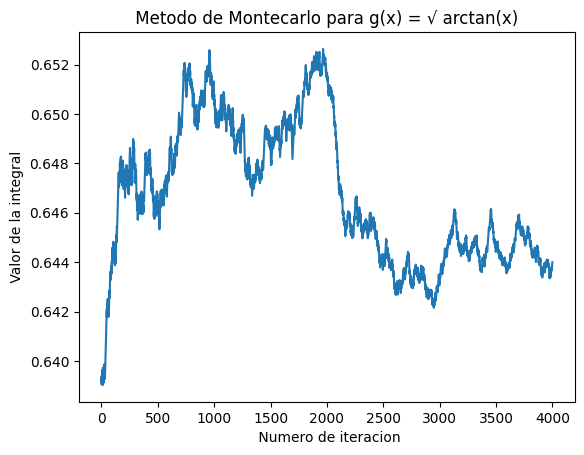

In [6]:
L = estado_transitorio(6000,0,1,1) # se define la funcion "estado_transitorio()" con a = 0, b = 1, c = 1, este resultado sera un arreglo con los valores de la integral I
plt.plot(L[2000:]) # la funcion plot mostrara una grafica con el eje X = [0,N = 6000] , Y = L = estado_transitorio(6000,0,1,1)
# tomando los datos del arreglo "L" empezando desde L[i = 20000] ( tomara los datos apartir del dato 2000 en adelante )
plt.xlabel ( " Numero de iteracion") # titulo del eje x
plt.ylabel ( " Valor de la integral ") # titulo del eje y
plt.title ( " Metodo de Montecarlo para g(x) = √ arctan(x) ") # titulo de la imagen


In [33]:
def MC_aciertoerror(n,a,b,c):
  startime = time.perf_counter() # se inicia un cronometro universal medido en segundos usando perf_counter
  for i in range (n): # para i = 0 , hasta i = n - 1
    e = mc(a,b,c,n) # se hace una evaluacion de la funcion mc(a,b,c,n)
  endtime = time.perf_counter() # al terminar cada evaluacin del ciclo for, se detine el cronometro usando perf_counter
  duration = endtime - startime #  la variable duration guardara el tiempo de ejecucion de la funcion MC_aciertoerror(n,a,b,c) restando endtime - startime
  return duration # devuelve la funcion duration como parametro de salida



In [38]:
t_1 = MC_aciertoerror(1000,0,1,1) # la variable r sera el valor de salida de la funcion MC_aciertoerror(n,a,b,c) para n = 1000, a = 0, b = 1, c = 1, que es el tiempo de ejecucion
print(f"El tiempo de ejecucion de Monte Carlo de Acierto y Error para 1000 iteraciones es: {r:.10f}") # mostrar la variable r con 10 digitos de visualiacion y que sea de tipo flotante

El tiempo de ejecucion de Monte Carlo de Acierto y Error para 1000 iteraciones es: 9.6636298440


<p align="center">
    <font size="10" color="lightblue" >Metodo de Montecarlo Crudo</font>
</p>


Se tiene la integral:

$$
I = \int_0^1 \sqrt{\arctan(x)} \, dx
$$



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Definir la función f(x) = sqrt(arctan(x))
def g(x):
    return np.sqrt(np.arctan(x))



Queremos calcular la integral:

$$
I = \int_a^b g(x)\, dx
$$

Sea $ X \sim U(a,b)$, su densidad es:

$$
f_X(x) =
\begin{cases}
\dfrac{1}{b-a}, & a \le x \le b, \\
0, & \text{en otro caso}.
\end{cases}
$$

La esperanza de $ g(X)$ se define como:

$$
\mathbb{E}[g(X)] = \int_{-\infty}^{\infty} g(x) f_X(x)\, dx.
$$



$$
\mathbb{E}[g(X)] = \int_a^b g(x)\, \frac{1}{b-a}\, dx.
$$

Sacamos el factor constante $\tfrac{1}{b-a}$:

$$
\mathbb{E}[g(X)] = \frac{1}{b-a} \int_a^b g(x)\, dx.
$$



Despejamos la integral:

$$
\int_a^b g(x)\, dx = (b-a)\,\mathbb{E}[g(X)].
$$



No podemos calcular $\mathbb{E}[g(X)]$ directamente, pero por la **Ley de los Grandes Números**:

$$
\frac{1}{n} \sum_{i=1}^n g(X_i) \;\;\longrightarrow\;\; \mathbb{E}[g(X)], \quad \text{cuando } n \to \infty.
$$

donde $X_1, X_2, \dots, X_n \sim U(a,b)$ son independientes.

Por lo tanto:

$$
\mathbb{E}[g(X)] \;\;\approx\;\; \frac{1}{n} \sum_{i=1}^n g(X_i).
$$



Reemplazamos la esperanza por su aproximación:

$$
I = \int_a^b g(x)\, dx \;\;\approx\;\; (b-a)\cdot \frac{1}{n}\sum_{i=1}^n g(X_i).
$$



Finalmente, obtenemos el estimador:

$$
\boxed {
  \theta_2 = (b-a)\frac{1}{n}\sum_{i=1}^n g(X_i)}
$$



Para que $ \theta_2 $ sea un estimador insesgado:

$$μ_{\theta_2}= \mathbb{E}[\theta_2]= I$$

<p align="center">
    <font size="10" color="lightblue" > Varianza del estimador Monte Carlo Crudo </font>
</p>


Sea
$$
\theta_2 = (b-a)\,\frac{1}{n}\sum_{i=1}^n g(X_i)
$$

Queremos calcular:

$$
\mathrm{Var}(\theta_2).
$$



Por definición:

$$
\mathrm{Var}(Z) = \mathbb{E}[Z^2] - \big(\mathbb{E}[Z]\big)^2.
$$

Entonces:

$$
\mathrm{Var}(\theta_2) = \mathbb{E}[\theta_2^2] - \big(\mathbb{E}[\theta_2]\big)^2.
$$

Omitiendo los calculos hechos para la varianza del estimador $\theta_2$, se tiene que:

$$
\boxed { \mathrm{Var}(\theta_2)
= \frac{(b-a)^2}{n}\left(\int_0^1 g(x)^2\,dx - \left(\int_0^1 g(x)\,dx\right)^2\right).}
$$


In [52]:
def mcc(n, a, b): # se define la funcion aproximacion(N,a,b) con los parametros a, b, N
    Y = []  # Esta lista guardara las muestras de g(x_i) para calcular la media
    # Las lista deben estar afuera del ciclos for
    for i in range(n): # para i = 0 hasta i = n - 1
        x_i = np.random.uniform(a, b) # se genera un numero aleatorio que sigue una distribucion uniforme en [a,b]
        y_i = g(x_i) # se evalua el numero aleatorio en la funcion g(x)
        Y.append(y_i) # se agrega el valor y_i al arreglo Y
    teta_2 = (b - a) * np.mean(Y) # estimacion de la integral I, usando el estimador θ_2
    var_theta_2 = (((b-a)**2)/n)*(0.4388245731 - (teta_2)**2) # se calcula la varianza del estimador θ_2
    des_theta_2 = np.sqrt(var_theta_2) # se calcula la desviacion estandar del estimador θ_2
    return teta_2, des_theta_2 ,var_theta_2 # el valor de salida es el valor del estimador θ_2, la varianza del estimador θ_2 y la desviacion estandar del estimador θ_2


r_2 = mcc(10000, 0, 1) # se nombra la varaible "r" que guardara el valor que suelta la funcion "aproximaciones(N,a,b) con N = 1000,a = 0 ,b = 1, que sera una tupla (teta_2, var_theta_2, des_theta_2 )

print(
    f"\nResultado de la integral aproximada: {r_2[0]:.10f}" # mostrara el primer elemento del objeto ""r" con 10 cifras significativas, con variable de tipo flotante
    f"\nEl error estándar de aproximación (desviación estándar) es: {r_2[1]:.10f}"  # mostrara el segundo elemento del objeto ""r" con 10 cifras significativas, con variable de tipo flotante
    f"\nEl error estándar de aproximación al cuadrado (varianza) es: {r_2[2]:.10f}" # mostrara el tercer elemento del objeto ""r" con 10 cifras significativas, con variable de tipo flotante
)




Resultado de la integral aproximada: 0.6311018287
El error estándar de aproximación (desviación estándar) es: 0.0020133319
El error estándar de aproximación al cuadrado (varianza) es: 0.0000040535


/tmp/ipython-input-1006494681.py:10: RuntimeWarning: invalid value encountered in sqrt
  std_teta_2 = np.sqrt(var_teta_2) # se calcula la desviacion estandar del estimador θ_2


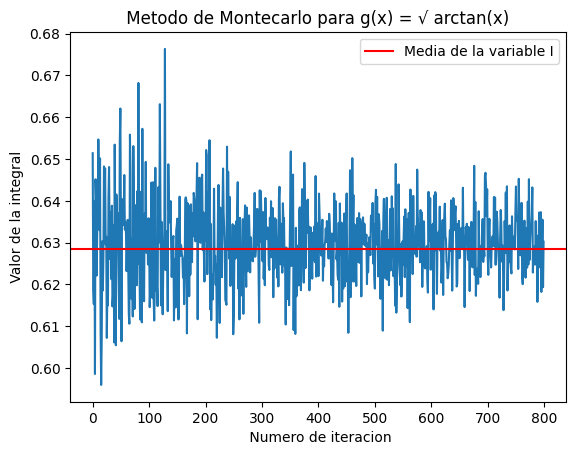

In [10]:
def estado_transitorio(n,a,b): # se define la funcion estado_transitorio()
  L = []
  for i in range (n): # desde i = 1 hasta i = n - 1
   resultado = mcc(i+1, a, b) # en la variable r se alamacena el resultado de de aplicar la funcion mcc(n,a,b) con n = i + 1 (con i = 0,1,... n) a = 0, b = 1, al ser el resultado
   # una tupla (teta_2, var_teta_2, std_teta_2), la variable resultado sera una serie de tuplas de 3 componentes
   e = resultado[0]  # seleccionamos el primer valor de la tupla (teta_2, var_teta_2, std_teta_2)
   L.append(e) # lo añadimos a la lista e
  mean_Y = np.mean(L) # se calcula la media de los valores de L
  plt.plot(L[200:]) # la funcion plot mostrara la grafica de la funcion, tomando X = [200,n] (se tomaran los datos apartir de la iteracion 200 en adelante),
  # Y =  L[200:] el valor de las aproximaciones de I = L[200:] ,apartir de i = 200
  mean_I = np.mean(L) # Se calcula la media de las evaluaciones
  plt.xlabel ( " Numero de iteracion") # titulo del eje x
  plt.ylabel ( " Valor de la integral ") # titulo del eje y
  plt.title ( " Metodo de Montecarlo para g(x) = √ arctan(x) ") # titulo de la imagen
  plt.axhline(mean_I, color="red", linestyle="-", label="Media de la variable I") # mostrara una linea vertical roja, de color rojo, con nombre "Media de la variable I", estilo "-",
  # que es el valor de la variable mean_I = np.mean(L) que es la media de la variable I
  plt.legend() # se usa este comando para motrar la leyenda
  plt.show() # se usa este comando para mostrar la grafica


estado_transitorio(1000,0,1) # se define la funcion "estado_transitorio(n)" para n = 1000

In [36]:
def MC_crudo(n,a,b):
  startime = time.perf_counter() # se inicia un cronometro universal medido en segundos usando perf_counter
  for i in range (n):# para i = 0 , hasta i = n - 1
    e = mcc(n,a,b)# se hace una evaluacion de la funcion mc(a,b,c,n)
  endtime = time.perf_counter() # al terminar cada evaluacin del ciclo for, se detine el cronometro usando perf_counter
  duration = endtime - startime#  la variable duration guardara el tiempo de ejecucion de la funcion MC_aciertoerror(n,a,b,c) restando endtime - startime
  return duration# devuelve la funcion duration como parametro de salida


t_2 = MC_crudo(1000,0,1)
print(f"El tiempo de ejecucion es: {t:.10f}")


El tiempo de ejecucion es: 5.2482612490


<p align="center">
    <font size="10" color="lightblue" > Eficiencia Crudo vs Acierto y Error  </font>
</p>

Para aproximar la integral: $$
\int_0^1 \sqrt{\arctan(x)} \, dx
$$

Se calcularon los estimadores:  

- $ \theta_1$: estimador de acierto y error.  
- $\theta_2$: estimador crudo.  

Ambos son insesgados:
$$
E[\theta_1] = E[\theta_2] = I.
$$

La diferencia está en su **varianza** y en el **tiempo de cómputo por simulación**.


<p align="center">
    <font size="6" color="lightblue" > Criterio general de eficiencia </font>
</p>

La eficiencia en Monte Carlo se mide como:
$$
\mathcal{E}(1 \text{ vs } 2) = \frac{\text{Costo del método 1}}{\text{Costo del método 2}}.
$$

Donde el **costo** se entiende como el producto entre:
- La **varianza del estimador** (precisión).  
- El **tiempo de cómputo por simulación** (costo en tiempo).  


Si cada simulación del método $ i$ tarda $t_i$ y el estimador tiene varianza $ \mathrm{Var}(\theta_i) $ en la iteracion $i$, el **error por unidad de tiempo** se mide como:

$$
\text{Error por unidad de tiempo} \;\;\sim\;\; t_i \cdot \mathrm{Var}(\theta_i).
$$

Se tiene que:


- $t_1$: es el **tiempo total** que tarda el método 1 en generar todas las iteraciones.  
  Formalmente:
  $$
  t_1 = \sum_{i=1}^n t_{1,i},
  $$
  donde $t_{1,i}$ es el tiempo de la iteración $i$ en el método 1.

- $t_2$: es el **tiempo total** que tarda el método 2 en generar todas las iteraciones:
  $$
  t_2 = \sum_{i=1}^n t_{2,i}.
  $$

- $\mathrm{Var}(\theta_1)$: es la **suma de las varianzas individuales** en cada iteración del método 1:  
  $$
  \mathrm{Var}(\theta_1) = \sum_{i=1}^n \mathrm{Var}(\theta_{1,i}).
  $$

- $\mathrm{Var}(\theta_2)$: es la **suma de las varianzas individuales** en cada iteración del método 2:  
  $$
  \mathrm{Var}(\theta_2) = \sum_{i=1}^n \mathrm{Var}(\theta_{2,i}).
  $$



Entonces se deefine la eficiencia relativa entre dos estimadores de Monte Carlo:

$$
\mathcal{E} = \frac{t_1 \, \mathrm{Var}(\theta_1)}{t_2 \, \mathrm{Var}(\theta_2)}.
$$

- El numerador $t_1 \, \mathrm{Var}(\theta_1)$ mide el **costo en tiempo y dispersión** del método 1.  
- El denominador $t_2 \, \mathrm{Var}(\theta_2)$ mide lo mismo pero para el método 2.  

Entonces:

- Si $\mathcal{E} < 1$, el método 1 es más eficiente.  
- Si $\mathcal{E} > 1$, el método 2 es más eficiente.  





In [58]:
def eficiencia(var_1,var_2, t_1,t_2):
  e = (var_2*t_2)/(var_1*t_1) # Formula de la eficiencia para dos metodos

  return print("El Monte Carlo Acierto y Error es mas eficiente que Monte Carlo Crudo") if e > 1 else print("Monte Carlo Crudo es mas eficinete que Monte Carlo Acierto y Error"
  f"\nEl valor de la eficiencia es: {e}")

var_1 = r_1[2] # se define la variable "var_1" que guardara el valor tercer valor de la tupla r_1, que es la desviacion estandar del estimador θ_1
var_2 = r_2[2] # se define la variable "var_2" que guardara el valor tercer valor de la tupla r_2, que es la desviacion estandar del estimador θ_2

eficiencia(var_1,var_2,t_1,t_2) # se evaluara la funcion eficiencia(var_1,var_2,t_1,t_2) con var_1 = r_1[2], var_2 = r_2[2], t_1 = t_1, t_2 = t_2


Monte Carlo Crudo es mas eficinete que Monte Carlo Acierto y Error
El valor de la eficiencia es: 0.013352895284889239
